<a href="https://colab.research.google.com/github/Wolfasaurus-08/DI_Bootcamp/blob/main/wk3day3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1: Duplicate Detection and Removal
Instructions
Objective: Identify and remove duplicate entries in the Titanic dataset.

Load the Titanic dataset.
Identify if there are any duplicate rows based on all columns.
Remove any duplicate rows found in the dataset.
Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')
titanic_data_copy = titanic_data.copy()
from sklearn.preprocessing import LabelEncoder

# Explore the dataset
print(titanic_data.head())
print(titanic_data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [25]:
# Count the number of duplicate rows
titanic_data_copy = titanic_data_copy.drop_duplicates()

# Verify duplicates are removed
print(titanic_data_copy.duplicated().sum())

0


 **Exercise 2:** Handling Missing Values
Instructions
Identify columns in the Titanic dataset with missing values.
Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
Apply each strategy to different columns based on the nature of the data.
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.

In [26]:
# Identify columns with missing values
missing_values = titanic_data_copy.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(f'Columns with missing values:\n{missing_columns}')

# Removal: Drop rows with missing values in 'Cabin' column
titanic_data_removed = titanic_data_copy.dropna(subset=['Cabin'])

# Imputation: Fill missing 'Age' values with the median age
titanic_data_copy.loc[:, 'Age'] = titanic_data_copy['Age'].fillna(titanic_data_copy['Age'].median())

# Filling with a constant value: Replace missing 'Embarked' values with 'Unknown'
titanic_data_copy['Embarked'] = titanic_data_copy['Embarked'].fillna('Unknown')

# Verify the changes
missing_values_after = titanic_data_copy.isnull().sum()
print(f'Missing values after handling:\n{missing_values_after}')

Columns with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64
Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [27]:
print(titanic_data_copy.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Exercise 3: Feature Engineering
Instructions,**
=
Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn's preprocessing module for encoding.

In [28]:
# Create 'FamilySize' feature
titanic_data_copy['FamilySize'] = titanic_data_copy['SibSp'] + titanic_data_copy['Parch'] + 1


titanic_data_copy['Title'] = titanic_data_copy['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

titanic_data_copy['Title'] = titanic_data_copy['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_data_copy['Title'] = titanic_data_copy['Title'].replace('Mlle', 'Miss')
titanic_data_copy['Title'] = titanic_data_copy['Title'].replace('Ms', 'Miss')
titanic_data_copy['Title'] = titanic_data_copy['Title'].replace('Mme', 'Mrs')

print(titanic_data_copy[['FamilySize', 'Title']].head())


   FamilySize Title
0           2    Mr
1           2   Mrs
2           1  Miss
3           2   Mrs
4           1    Mr


**Exercise 5: Data Standardization and Normalization**
Instructions
Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.

              Age        Fare  FamilySize
count  891.000000  891.000000  891.000000
mean    29.361582   32.204208    1.904602
std     13.019697   49.693429    1.613459
min      0.420000    0.000000    1.000000
25%     22.000000    7.910400    1.000000
50%     28.000000   14.454200    1.000000
75%     35.000000   31.000000    2.000000
max     80.000000  512.329200   11.000000


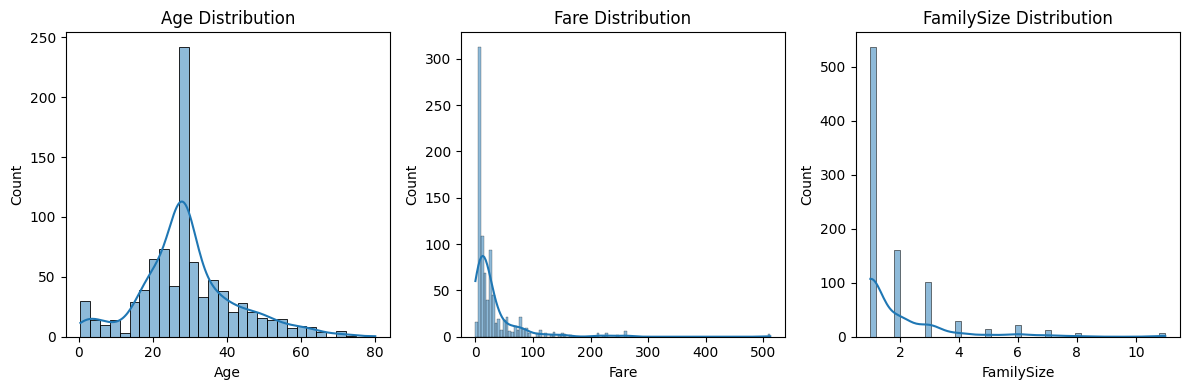

In [29]:
# Descriptive statistics
print(titanic_data_copy[['Age', 'Fare', 'FamilySize']].describe())


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(titanic_data_copy['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(titanic_data_copy['Fare'], kde=True)
plt.title('Fare Distribution')

plt.subplot(1, 3, 3)
sns.histplot(titanic_data_copy['FamilySize'], kde=True)
plt.title('FamilySize Distribution')

plt.tight_layout()
plt.show()

In [30]:
# Standardization
numerical_features_to_standardize = ['Age', 'Fare']
scaler = StandardScaler()
titanic_data_copy[numerical_features_to_standardize] = scaler.fit_transform(titanic_data_copy[numerical_features_to_standardize])


In [32]:
import numpy as np
titanic_data_copy['Age'] = titanic_data_copy['Age'].replace([np.inf, -np.inf], np.nan)
titanic_data_copy['Age'] = titanic_data_copy['Age'].fillna(titanic_data_copy['Age'].median())

 **Exercise 6: Feature Encoding
Instructions**
Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

titanic_data_encoded = pd.get_dummies(titanic_data_copy, columns=['Sex', 'Embarked'], drop_first=True)

print(titanic_data_encoded.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare Cabin  FamilySize Title  Sex_male  Embarked_Q  \
0         A/5 21171 -0.502445   NaN           2    Mr      True       False   
1          PC 17599  0.786845   C85           2   Mrs     False       False   
2  STON/O2. 3101282 -0.488854   NaN           1  Miss     False  

**Exercise 7: Data Transformation for Age Feature**
Instructions
Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [37]:
# Check for infinite values in the 'Age' column
if not np.all(np.isfinite(titanic_data_copy['Age'])):
    print("There are infinite values in the Age column.")
    # Replace or handle infinite values as necessary
    titanic_data_copy['Age'] = np.where(np.isfinite(titanic_data_copy['Age']), titanic_data_copy['Age'], np.nan)

# Reapply imputation if necessary
titanic_data_copy['Age'] = titanic_data_copy['Age'].fillna(titanic_data_copy['Age'].median())


There are infinite values in the Age column.


In [38]:
if not np.all(np.isfinite(titanic_data_copy['Age'])):
    print("There are infinite values in the Age column.")

# Replace infinite values with NaN
titanic_data_copy['Age'] = np.where(np.isfinite(titanic_data_copy['Age']), titanic_data_copy['Age'], np.nan)

# Reapply imputation to fill NaN values
titanic_data_copy['Age'] = titanic_data_copy['Age'].fillna(titanic_data_copy['Age'].median())

In [40]:
print(titanic_data_copy['Age'].isnull().sum())
print(np.isfinite(titanic_data_copy['Age']).sum())


0
891


In [41]:

bins = [0, 12, 18, 25, 35, 50, 65, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']

titanic_data_copy['AgeGroup'] = pd.cut(titanic_data_copy['Age'], bins=bins, labels=labels, right=False)

age_group_dummies = pd.get_dummies(titanic_data_copy['AgeGroup'], prefix='AgeGroup', drop_first=True)

titanic_data_encoded = pd.concat([titanic_data_copy, age_group_dummies], axis=1)

print(titanic_data_encoded[['Age', 'AgeGroup'] + list(age_group_dummies.columns)].head())

    Age     AgeGroup  AgeGroup_Teen  AgeGroup_Young Adult  AgeGroup_Adult  \
0  22.0  Young Adult          False                  True           False   
1  38.0  Middle-Aged          False                 False           False   
2  26.0        Adult          False                 False            True   
3  35.0  Middle-Aged          False                 False           False   
4  35.0  Middle-Aged          False                 False           False   

   AgeGroup_Middle-Aged  AgeGroup_Senior  AgeGroup_Elderly  
0                 False            False             False  
1                  True            False             False  
2                 False            False             False  
3                  True            False             False  
4                  True            False             False  
